# Analyzing data from clusters FAMD

In [2]:
import pandas as pd
import numpy as np
import json
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
# Configuración de pandas 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Loading data

In [3]:
path_file = 'clusters_FAMD.csv'
data = pd.read_csv(path_file, index_col=0)
data.head()

,state,arrears_days,total_paid,Monto Acumulado,Uso de los recursos,Plazo,Sector,Ingresos,Ubicación,Estrato Mínimo,Procesos judiciales,Alertas,Score Bureau Empresa,Huellas de Consulta,Website empresa,Instagram empresa,LinkedIn empresa,LinkedIn empresarios,Edad empresarios,Activador,Número de accionistas,Impacto,Acceso previso a la banca,# Empleados,Mujeres empresarias,Mujeres en cargos directivos,cluster_id_2,cluster_id_3
0,PAID,17,147915805,250000000,CR,25 a 36 meses,Servicios,Seed,Medellín,5,No,No,925,8,Si,Si,Si,Si,45,Internet,2,No,Si,16,No,2,1,0
1,PAID,23,91852726,250000000,CR,25 a 36 meses,Servicios,Seed,Medellín,5,No,No,925,8,Si,Si,Si,Si,45,Internet,2,No,Si,16,No,2,1,1
2,PAID,14,15211138,50000000,KT - EX,13 a 24 meses,Servicios,Seed,Medellín,3,No,No,924,2,Si,No,Si,No,32,SocialNetworks,3,No,Si,3,No,0,1,1
3,PAID,64,8713879,40000000,SP,13 a 24 meses,Industria,Seed,Medellín,4,No,No,861,1,Si,No,Si,Si,44,CreditProfessionalContact,2,No,Si,5,No,0,1,1
4,PAID,64,8102608,40000000,SP,13 a 24 meses,Industria,Seed,Medellín,4,No,No,861,1,Si,No,Si,Si,44,CreditProfessionalContact,2,No,Si,5,No,0,1,1


In [4]:
data.isnull().any()

state                           False
arrears_days                    False
total_paid                      False
Monto Acumulado                 False
Uso de los recursos             False
Plazo                           False
Sector                          False
Ingresos                        False
Ubicación                       False
Estrato Mínimo                  False
Procesos judiciales             False
Alertas                         False
Score Bureau Empresa            False
Huellas de Consulta             False
Website empresa                 False
Instagram empresa               False
LinkedIn empresa                False
LinkedIn empresarios            False
Edad empresarios                False
Activador                       False
Número de accionistas           False
Impacto                         False
Acceso previso a la banca       False
# Empleados                     False
Mujeres empresarias             False
Mujeres en cargos directivos    False
cluster_id_2

## Data analysis

This section is to analyze clusters behaviour with two cathegorization of clients

### Cathegorical data

Text(0.5, 0.98, 'Frecuency of observation by cluster_id_2')

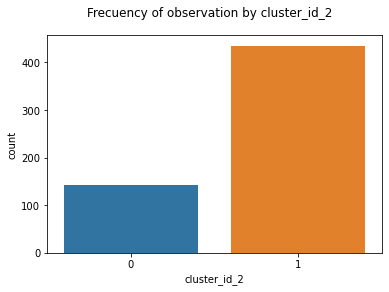

In [5]:
sns.countplot(x='cluster_id_2', data = data)
plt.suptitle('Frecuency of observation by cluster_id_2')

In [6]:
data['cluster_id_2'].value_counts()

1    435
0    142
Name: cluster_id_2, dtype: int64

We can see that there are more customers on the cluster_1 than the cluster_0

### Analyzing relationship on other variables with two clusters

In [7]:
#----------------------------------------------------------------

#### Cathegorical = cluster_id_2 vs Quantitative = 'Column name'

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   state                         577 non-null    object
 1   arrears_days                  577 non-null    int64 
 2   total_paid                    577 non-null    int64 
 3   Monto Acumulado               577 non-null    int64 
 4   Uso de los recursos           577 non-null    object
 5   Plazo                         577 non-null    object
 6   Sector                        577 non-null    object
 7   Ingresos                      577 non-null    object
 8   Ubicación                     577 non-null    object
 9   Estrato Mínimo                577 non-null    int64 
 10  Procesos judiciales           577 non-null    object
 11  Alertas                       577 non-null    object
 12  Score Bureau Empresa          577 non-null    int64 
 13  Huellas de Consulta 

Text(0.5, 0.98, 'Cluster_id_2 vs arrears_days')

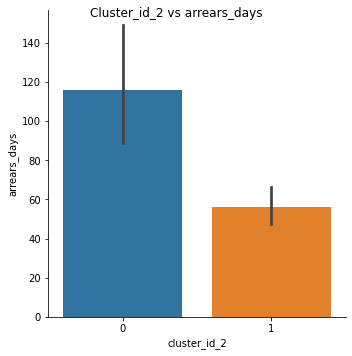

In [9]:
sns.catplot(x='cluster_id_2', y='arrears_days', kind='bar', data=data)
plt.suptitle('Cluster_id_2 vs arrears_days')

On this graph we can see that cluster 1 has less arrears_days than cluster 0

Text(0.5, 0.98, 'Cluster_id_2 vs Monto Acumulado')

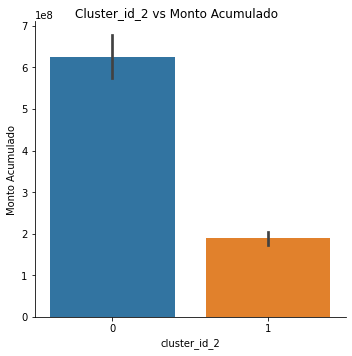

In [10]:
sns.catplot(x='cluster_id_2', y='Monto Acumulado', kind='bar', data=data)
plt.suptitle('Cluster_id_2 vs Monto Acumulado')

Cluster 1 has less 'Monto Acumulado' than cluster 0

Text(0.5, 0.98, 'Cluster_id_2 vs Score Bureau Empresa')

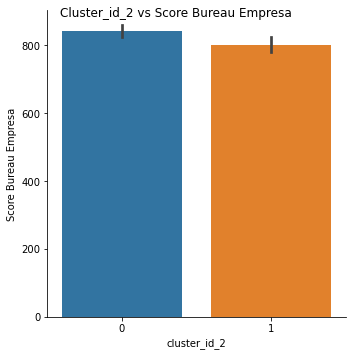

In [11]:
sns.catplot(x='cluster_id_2', y='Score Bureau Empresa', kind='bar', data=data)
plt.suptitle('Cluster_id_2 vs Score Bureau Empresa')

Score Bureau between the two clusters are relatively similar

Text(0.5, 0.98, 'Cluster_id_2 vs Huellas de Consulta')

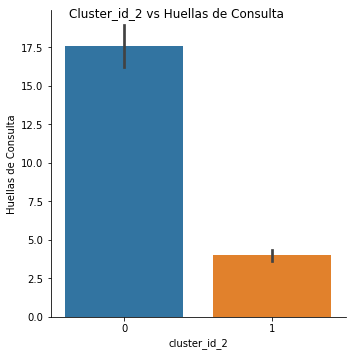

In [12]:
sns.catplot(x='cluster_id_2', y='Huellas de Consulta', kind='bar', data=data)
plt.suptitle('Cluster_id_2 vs Huellas de Consulta')

Cluster 1 has less 'Huellas de consulta' than cluster 0

Text(0.5, 0.98, 'Cluster_id_2 vs Número de accionistas')

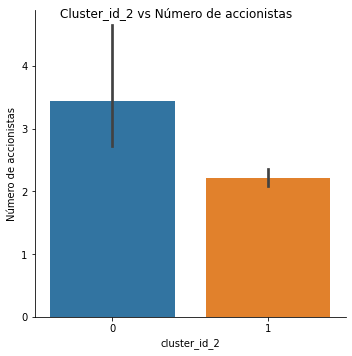

In [13]:
sns.catplot(x='cluster_id_2', y='Número de accionistas', kind='bar', data=data)
plt.suptitle('Cluster_id_2 vs Número de accionistas')

Cluster 0 has more 'Accionistas' than cluster 1

Text(0.5, 0.98, 'Cluster_id_2 vs # Empleados')

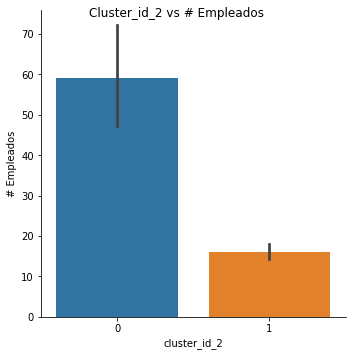

In [14]:
sns.catplot(x='cluster_id_2', y='# Empleados', kind='bar', data=data)
plt.suptitle('Cluster_id_2 vs # Empleados')

Cluster 1 has more 'Empleados' than cluster 0

Text(0.5, 0.98, 'Cluster_id_2 vs Mujeres en cargos directivos')

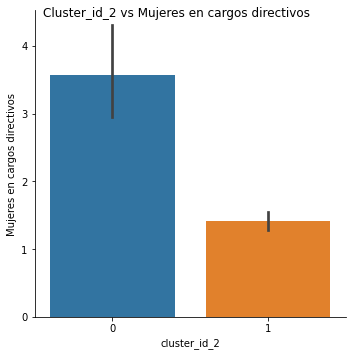

In [15]:
sns.catplot(x='cluster_id_2', y='Mujeres en cargos directivos', kind='bar', data=data)
plt.suptitle('Cluster_id_2 vs Mujeres en cargos directivos')

Cluster 1 has more 'Mujeres en cargos directivos' than cluster 0

In [16]:
#--------------------------------------------------------

#### Cathegorical = cluster_id_2 vs Cathegorical = 'Column name'

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   state                         577 non-null    object
 1   arrears_days                  577 non-null    int64 
 2   total_paid                    577 non-null    int64 
 3   Monto Acumulado               577 non-null    int64 
 4   Uso de los recursos           577 non-null    object
 5   Plazo                         577 non-null    object
 6   Sector                        577 non-null    object
 7   Ingresos                      577 non-null    object
 8   Ubicación                     577 non-null    object
 9   Estrato Mínimo                577 non-null    int64 
 10  Procesos judiciales           577 non-null    object
 11  Alertas                       577 non-null    object
 12  Score Bureau Empresa          577 non-null    int64 
 13  Huellas de Consulta 

In [18]:
data.groupby('cluster_id_2')['state'].value_counts()/len(data)

cluster_id_2  state
0             PAID     0.159445
              LATE     0.086655
1             PAID     0.483536
              LATE     0.270364
Name: state, dtype: float64

Cluster 0 has more clients on state PAID than cluster 1, but at the same time has more clients on Late than cluster 1

In [19]:
data.groupby('cluster_id_2')['Uso de los recursos'].value_counts()/len(data)

cluster_id_2  Uso de los recursos
0             KT - CO                0.098787
              KT - EX                0.086655
              CR                     0.046794
              SP                     0.013865
1             KT - CO                0.275563
              KT - EX                0.261698
              CR                     0.116118
              SP                     0.100520
Name: Uso de los recursos, dtype: float64

We can see the distribution between the two clusters

In [20]:
data.groupby('cluster_id_2')['Plazo'].value_counts()/len(data)

cluster_id_2  Plazo            
0             Menos de 12 meses    0.109185
              13 a 24 meses        0.084922
              25 a 36 meses        0.036395
              Más de 37 meses      0.015598
1             13 a 24 meses        0.422877
              Menos de 12 meses    0.209705
              25 a 36 meses        0.117851
              Más de 37 meses      0.003466
Name: Plazo, dtype: float64

In [21]:
# Cluster 0 has more clients on 'Plazo' on 13 to 24 months. On the other hand we have cluster 1 with 'Plazo' less than 12 months

In [22]:
data.groupby('cluster_id_2')['Sector'].value_counts()/len(data)

cluster_id_2  Sector   
0             Industria    0.123050
              Servicios    0.093588
              Comercio     0.029463
1             Servicios    0.504333
              Comercio     0.131716
              Industria    0.117851
Name: Sector, dtype: float64

In [23]:
# Cluster 0 has a ranking of (Servicios, Comercio and Industria) - Cluster 1 has a ranking of (Servicios, Industria y Comercio)

In [24]:
data.groupby('cluster_id_2')['Ingresos'].value_counts()/len(data)

cluster_id_2  Ingresos
0             Growth      0.091854
              Venture     0.083189
              Scale Up    0.069324
              Seed        0.001733
1             Seed        0.435009
              Venture     0.213172
              Scale Up    0.090121
              Growth      0.015598
Name: Ingresos, dtype: float64

In [25]:
data.groupby('cluster_id_2')['Acceso previso a la banca'].value_counts()/len(data)

cluster_id_2  Acceso previso a la banca
0             Si                           0.239168
              No                           0.006932
1             Si                           0.464471
              No                           0.289428
Name: Acceso previso a la banca, dtype: float64

In [26]:
data.groupby('cluster_id_2')['Mujeres empresarias'].value_counts()/len(data)

cluster_id_2  Mujeres empresarias
0             No                     0.223570
              Si                     0.022530
1             No                     0.582322
              Si                     0.171577
Name: Mujeres empresarias, dtype: float64

In [27]:
data.groupby('cluster_id_2')['Activador'].value_counts()/len(data)

cluster_id_2  Activador                
0             Other                        0.103986
              FriendOrColleague            0.060659
              CreditProfessionalContact    0.057192
              Internet                     0.012132
              Newspapers                   0.005199
              SocialNetworks               0.003466
              Email                        0.001733
              Referrer                     0.001733
1             FriendOrColleague            0.237435
              Internet                     0.135182
              CreditProfessionalContact    0.098787
              Other                        0.095321
              Newspapers                   0.064125
              SocialNetworks               0.046794
              Referrer                     0.038128
              CommunicationMedia           0.012132
              Email                        0.010399
              RutaN                        0.008666
              Fenalco   

In [28]:
data.groupby('cluster_id_2')['Website empresa'].value_counts()/len(data)

cluster_id_2  Website empresa
0             Si                 0.201040
              No                 0.045061
1             Si                 0.500867
              No                 0.253033
Name: Website empresa, dtype: float64

In [29]:
data.groupby('cluster_id_2')['Estrato Mínimo'].value_counts()/len(data)

cluster_id_2  Estrato Mínimo
0             5                 0.090121
              4                 0.072790
              6                 0.048527
              3                 0.034662
1             4                 0.254766
              5                 0.225303
              6                 0.140381
              3                 0.126516
              2                 0.006932
Name: Estrato Mínimo, dtype: float64

In [30]:
data.groupby('cluster_id_2')['Ubicación'].value_counts()/len(data)

cluster_id_2  Ubicación          
0             Bogotá D.C.            0.077990
              Medellín               0.064125
              Itagüí                 0.031196
              La Estrella            0.031196
              Sabaneta               0.017331
              Envigado               0.010399
              Barranquilla           0.006932
              Manizales              0.003466
              Bello                  0.001733
              Cartagena de indias    0.001733
1             Bogotá D.C.            0.329289
              Medellín               0.299827
              Barranquilla           0.029463
              Envigado               0.025997
              Cali                   0.015598
              Bucaramanga            0.010399
              La Estrella            0.008666
              Itagüí                 0.005199
              Pereira                0.005199
              Rionegro               0.005199
              Manizales              0.003466


In [31]:
data.groupby('cluster_id_2')['Procesos judiciales'].value_counts()/len(data)

cluster_id_2  Procesos judiciales
0             No                     0.173310
              Si                     0.072790
1             No                     0.668977
              Si                     0.084922
Name: Procesos judiciales, dtype: float64

In [32]:
data.groupby('cluster_id_2')['Instagram empresa'].value_counts()/len(data)

cluster_id_2  Instagram empresa
0             Si                   0.138648
              No                   0.107452
1             No                   0.402080
              Si                   0.351820
Name: Instagram empresa, dtype: float64

In [33]:
data.groupby('cluster_id_2')['Impacto'].value_counts()/len(data)

cluster_id_2  Impacto
0             No         0.235702
              Si         0.010399
1             No         0.682842
              Si         0.071057
Name: Impacto, dtype: float64

### Analyzing relationship on other variables with three clusters

This section is to analyze clusters behaviour with three cathegorization of clients

### Cathegorical data

#### Cathegorical = cluster_id_2 vs Quantitative = 'Column name'

In [34]:
data.columns

Index(['state', 'arrears_days', 'total_paid', 'Monto Acumulado', 'Uso de los recursos', 'Plazo', 'Sector', 'Ingresos', 'Ubicación', 'Estrato Mínimo', 'Procesos judiciales', 'Alertas', 'Score Bureau Empresa', 'Huellas de Consulta', 'Website empresa', 'Instagram empresa', 'LinkedIn empresa', 'LinkedIn empresarios', 'Edad empresarios', 'Activador', 'Número de accionistas', 'Impacto', 'Acceso previso a la banca', '# Empleados', 'Mujeres empresarias', 'Mujeres en cargos directivos', 'cluster_id_2', 'cluster_id_3'], dtype='object')

Text(0.5, 0.98, 'Frecuency of observation by cluster_id_3')

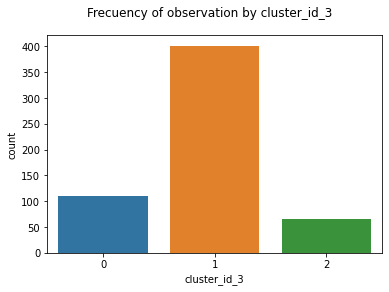

In [35]:
sns.countplot(x='cluster_id_3', data = data)
plt.suptitle('Frecuency of observation by cluster_id_3')

### Analyzing relationship on other variables with three clusters

In [36]:
#--------------------------------------------------------------------

#### Cathegorical = cluster_id_3 vs Quantitative = 'Column name'

Text(0.5, 0.98, 'Cluster_id_3 vs arrears_days')

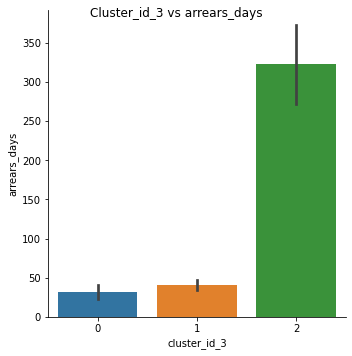

In [37]:
sns.catplot(x='cluster_id_3', y='arrears_days', kind='bar', data=data)
plt.suptitle('Cluster_id_3 vs arrears_days')

Text(0.5, 0.98, 'Cluster_id_3 vs Monto Acumulado')

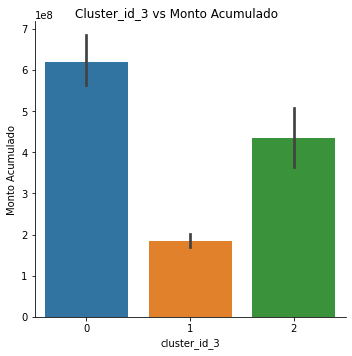

In [38]:
sns.catplot(x='cluster_id_3', y='Monto Acumulado', kind='bar', data=data)
plt.suptitle('Cluster_id_3 vs Monto Acumulado')

Text(0.5, 0.98, 'Cluster_id_3 vs Score Bureau Empresa')

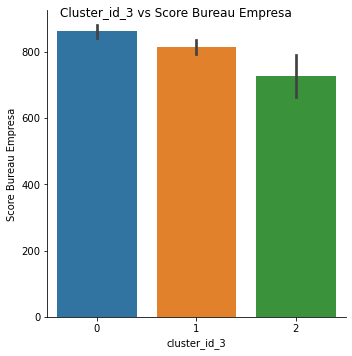

In [39]:
sns.catplot(x='cluster_id_3', y='Score Bureau Empresa', kind='bar', data=data)
plt.suptitle('Cluster_id_3 vs Score Bureau Empresa')

Text(0.5, 0.98, 'Cluster_id_3 vs Número de accionistas')

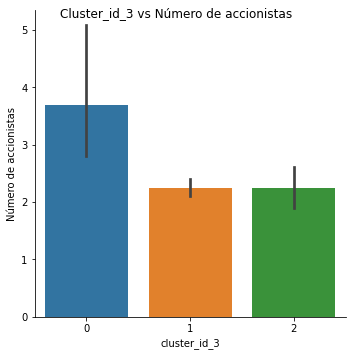

In [40]:
sns.catplot(x='cluster_id_3', y='Número de accionistas', kind='bar', data=data)
plt.suptitle('Cluster_id_3 vs Número de accionistas')

Text(0.5, 0.98, 'Cluster_id_3 vs # Empleados')

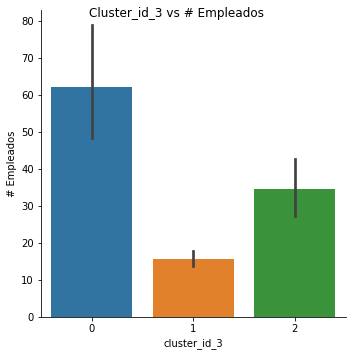

In [41]:
sns.catplot(x='cluster_id_3', y='# Empleados', kind='bar', data=data)
plt.suptitle('Cluster_id_3 vs # Empleados')

Text(0.5, 0.98, 'Cluster_id_3 vs Mujeres en cargos directivos')

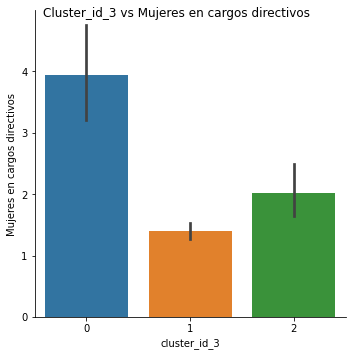

In [42]:
sns.catplot(x='cluster_id_3', y='Mujeres en cargos directivos', kind='bar', data=data)
plt.suptitle('Cluster_id_3 vs Mujeres en cargos directivos')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   state                         577 non-null    object
 1   arrears_days                  577 non-null    int64 
 2   total_paid                    577 non-null    int64 
 3   Monto Acumulado               577 non-null    int64 
 4   Uso de los recursos           577 non-null    object
 5   Plazo                         577 non-null    object
 6   Sector                        577 non-null    object
 7   Ingresos                      577 non-null    object
 8   Ubicación                     577 non-null    object
 9   Estrato Mínimo                577 non-null    int64 
 10  Procesos judiciales           577 non-null    object
 11  Alertas                       577 non-null    object
 12  Score Bureau Empresa          577 non-null    int64 
 13  Huellas de Consulta 

In [44]:
data.columns

Index(['state', 'arrears_days', 'total_paid', 'Monto Acumulado', 'Uso de los recursos', 'Plazo', 'Sector', 'Ingresos', 'Ubicación', 'Estrato Mínimo', 'Procesos judiciales', 'Alertas', 'Score Bureau Empresa', 'Huellas de Consulta', 'Website empresa', 'Instagram empresa', 'LinkedIn empresa', 'LinkedIn empresarios', 'Edad empresarios', 'Activador', 'Número de accionistas', 'Impacto', 'Acceso previso a la banca', '# Empleados', 'Mujeres empresarias', 'Mujeres en cargos directivos', 'cluster_id_2', 'cluster_id_3'], dtype='object')

### Multi-linear regression

In [45]:
X = data[['Huellas de Consulta', 'Score Bureau Empresa']]
Y = data['arrears_days']
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           arrears_days   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     24.68
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           5.21e-11
Time:                        16:40:39   Log-Likelihood:                -3606.5
No. Observations:                 577   AIC:                             7219.
Df Residuals:                     574   BIC:                             7232.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  123.8634 